In [16]:
# for multiple stocks 
import datetime as dt
import pandas as pd
import yfinance as yf
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}

for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="15m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [17]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-05-14 14:00:00,22258.650391,22269.949219,22246.000000,22250.849609,22250.849609,0
2024-05-14 14:15:00,22250.699219,22266.400391,22217.699219,22256.599609,22256.599609,0
2024-05-14 14:30:00,22256.300781,22259.750000,22226.150391,22236.900391,22236.900391,0
2024-05-14 14:45:00,22236.250000,22248.550781,22228.199219,22236.750000,22236.750000,0
2024-05-14 15:00:00,22233.900391,22233.900391,22233.900391,22233.900391,22233.900391,0


### MACD = Moving Average Convergence Divergence

In [18]:
def macd(DF,fast_length=12,slow_length=26,signal_smoothing=9):
    df= DF.copy()
    df["ma_fast"]=df["Adj Close"].ewm(span=fast_length,min_periods=fast_length).mean()
    df["ma_slow"]=df["Adj Close"].ewm(span=slow_length,min_periods=slow_length).mean()
    df["macd"]= df["ma_fast"]-df["ma_slow"]
    df["signal"] = df["macd"].ewm(span=signal_smoothing,min_periods=signal_smoothing).mean()
    return df.loc[:,["macd","signal"]]

for ticker in ohlcv:
    ohlcv[ticker][["MACD","SIGNAL"]]= macd(ohlcv[ticker])    


In [19]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,SIGNAL
Datetime,,,,,,,,
2024-05-14 14:00:00,22258.650391,22269.949219,22246.000000,22250.849609,22250.849609,0,47.529278,44.465547
2024-05-14 14:15:00,22250.699219,22266.400391,22217.699219,22256.599609,22256.599609,0,47.546763,45.081790
2024-05-14 14:30:00,22256.300781,22259.750000,22226.150391,22236.900391,22236.900391,0,45.447171,45.154867
2024-05-14 14:45:00,22236.250000,22248.550781,22228.199219,22236.750000,22236.750000,0,43.272279,44.778349
2024-05-14 15:00:00,22233.900391,22233.900391,22233.900391,22233.900391,22233.900391,0,40.847852,43.992250


NIFTY MACD AT 2:45pm
MACD= 43.27:
We got MACD= 43.2 and Signal=44.7

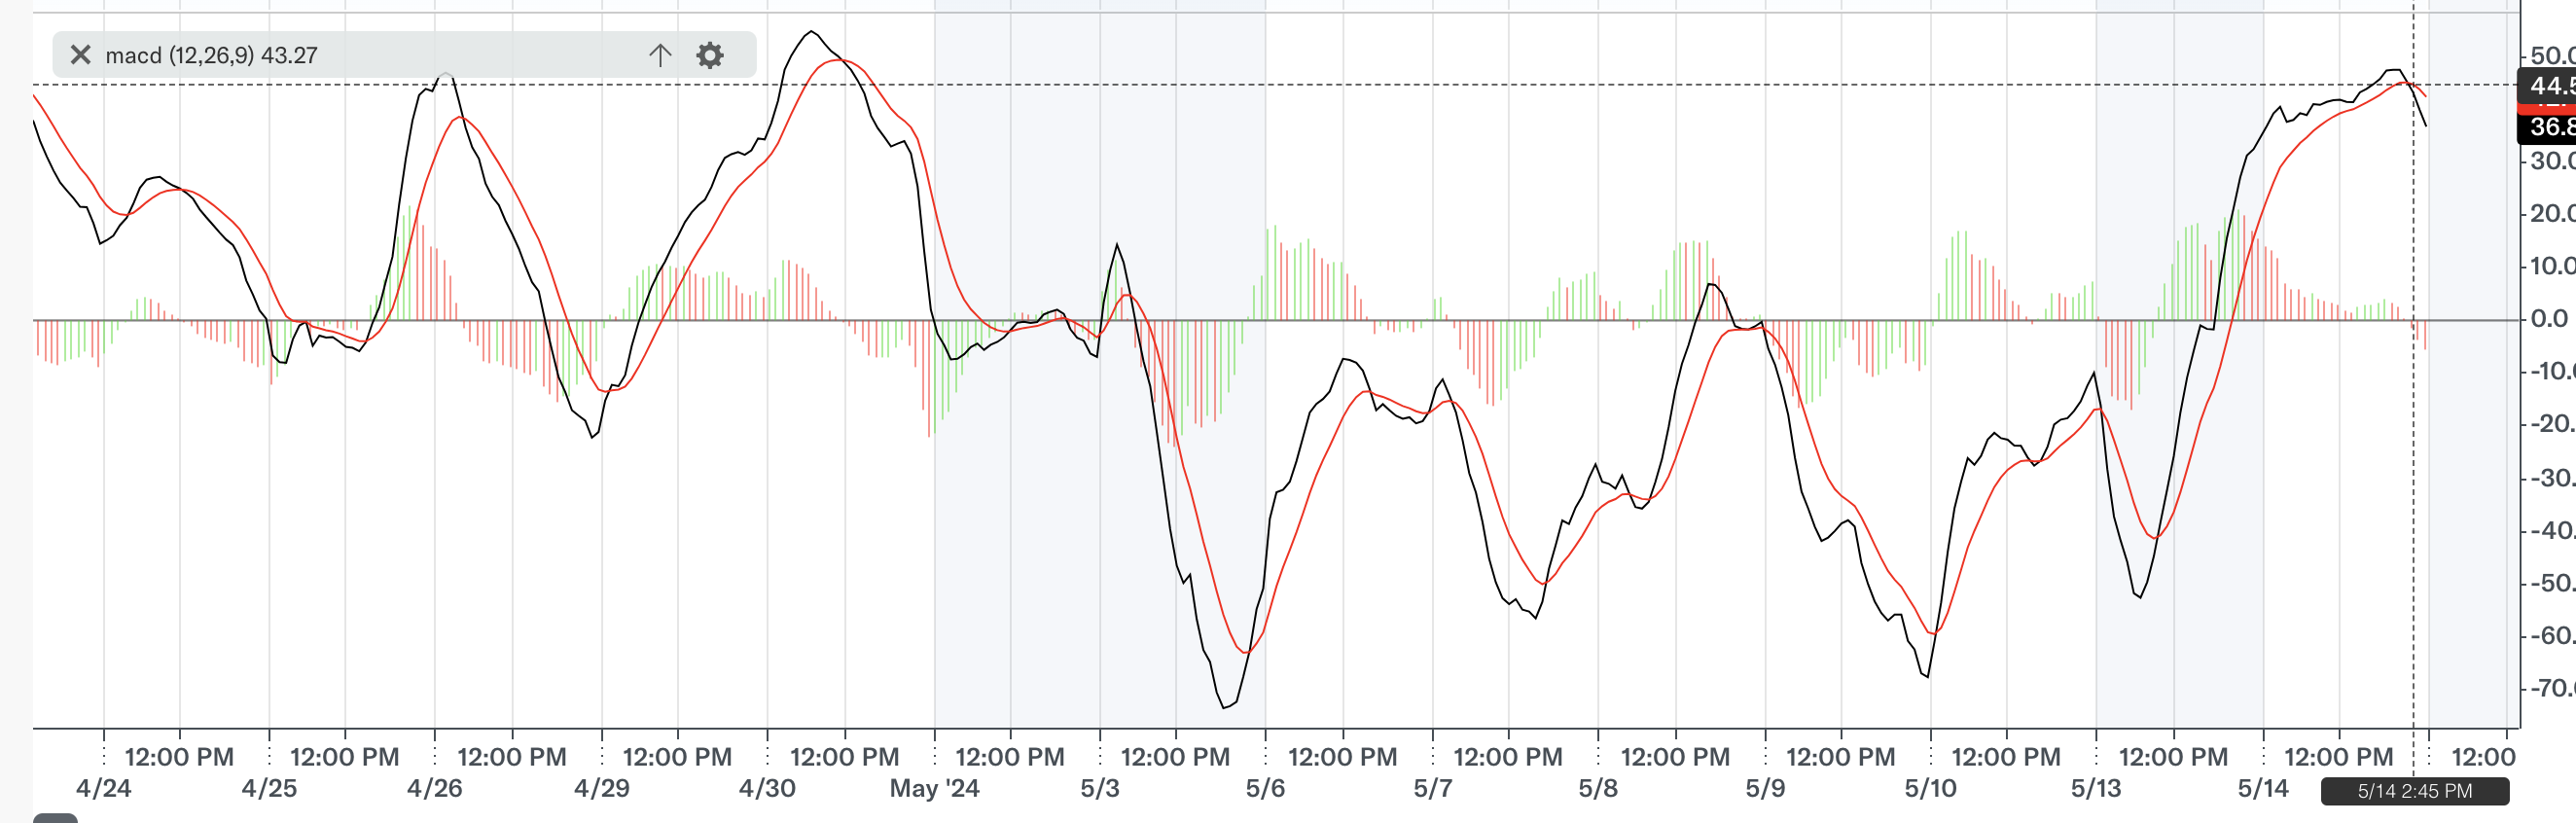

### Bolinger Bands and ATR(Average True Range)

ATR formula:

The Current Period High minus (-) Current Period Low

The Absolute Value (abs) of the Current Period High minus (-) The Previous Period Close

The Absolute Value (abs) of the Current Period Low minus (-) The Previous Period Close

true range = max[(high - low), abs(high - previous close), abs (low - previous close)]

In [26]:
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}

for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="15m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [35]:
def atr(DF,window=14):
    df=DF.copy()
    df["h-l"]=df["High"]-df["Low"]
    df["h-PC"]=df["High"]-df["Adj Close"].shift(1)
    df["l-PC"]=df["Low"]-df["Adj Close"].shift(1)
    df["tr"]=df[["h-l","h-PC","l-PC"]].max(axis=1,skipna=False)

    df["atr"]=df["tr"].ewm(com=window,min_periods=window).mean()
    return df["atr"]



for ticker in ohlcv:
    ohlcv[ticker]["ATR"]= atr(ohlcv[ticker]) 

In [36]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2024-05-15 14:15:00,22210.400391,22215.449219,22182.150391,22190.650391,22190.650391,0,35.546307
2024-05-15 14:30:00,22192.949219,22217.949219,22184.550781,22202.449219,22202.449219,0,35.403116
2024-05-15 14:45:00,22201.849609,22227.949219,22201.050781,22224.349609,22224.349609,0,34.836137
2024-05-15 15:00:00,22221.949219,22233.550781,22183.449219,22205.050781,22205.050781,0,35.853832
2024-05-15 15:15:00,22203.449219,22214.949219,22188.900391,22210.400391,22210.400391,0,35.200165


ATR we got at 3:15= 35.2
From yFinance= 35.05

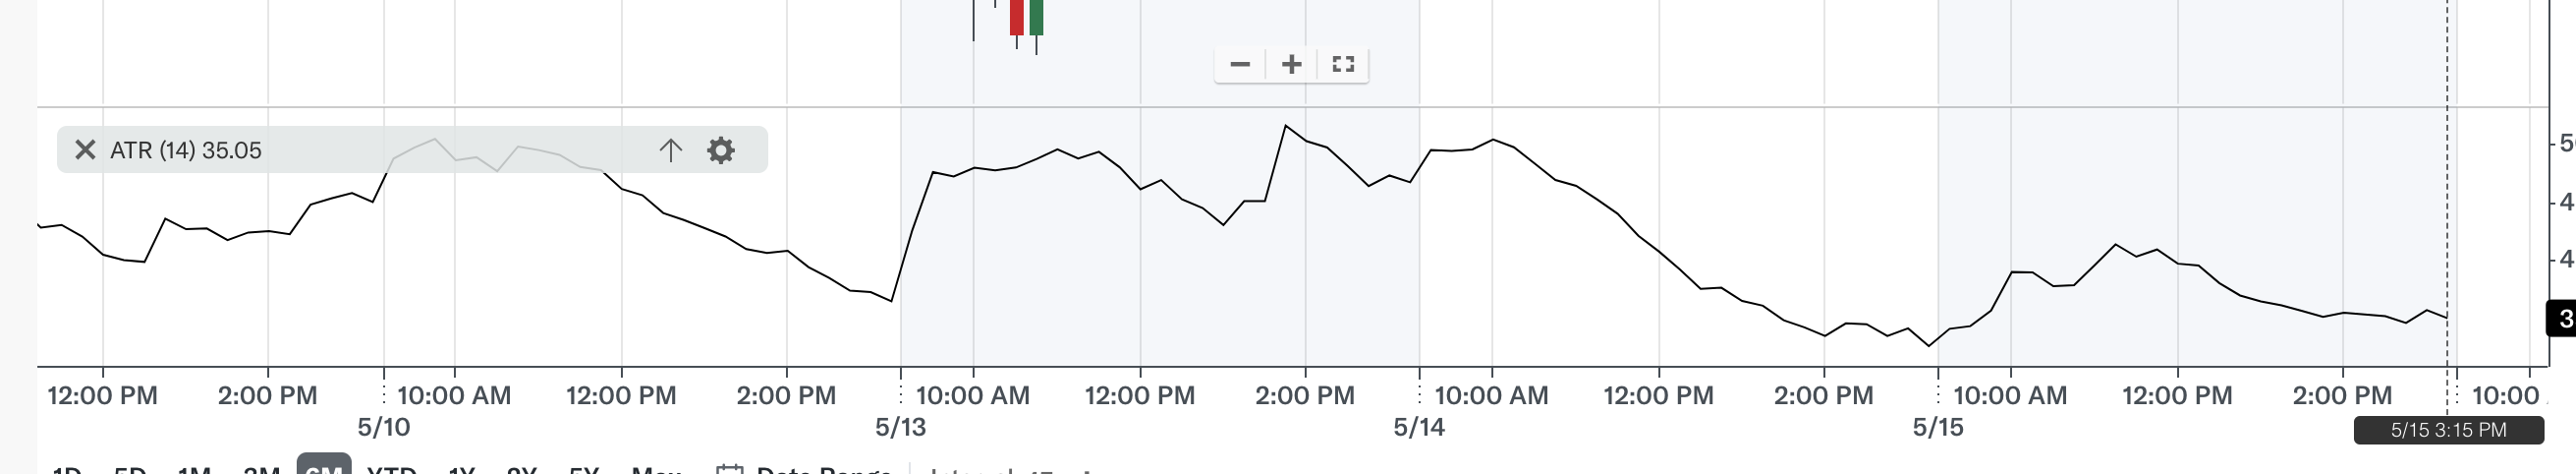